# Analyzing the e-commerce Big Data Using Spark (Running on Local Machine)

### 1. Goals
* In this notebook, we're going to go through the Olist Ecommerce Data with more than 4 millions records (almost 2Gb of data) with the goal of understanding the data and doing the data transformations by using PySpark. 

* Spark and Hadoop have been installed and set up locally, due to the limit of local machine, I struggled to handle the data at the beginning but utimately already overcomed the issues to deliver the rough analyst of the e-commerce data. 

### 2 . Data
Data being used is merged from different datasets namely customers dataset, order_item dataset, product dataset, seller_dataset...into one to create the most holistic view of a transaction.

The more details could be find at: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/code




### 3.Data Analysis



### Configuration 

In [124]:
#install the necessary libraries
#!pip3 install pyspark==3.2.1
#!pip install findspark
#!pip3 install matplotlib

In [53]:
#import the libaries
import findspark
findspark.init()
import pyspark
#import pyspark.sql.functions as F
from pyspark import SparkContext
from pyspark.sql.functions import *
#from pyspark.sql.functions import countDistinct 
from pyspark.sql import SparkSession 


#SparkContext.setSystemProperty('spark.executor.memory', '4g')
#SparkContext.setSystemProperty('spark.driver.maxResultSize', '10g')
#SparkContext.stop(sc)
#SparkContext.sc.getConf()

In [3]:
#Set up Spark Session and Context
spark = SparkSession.builder.master("local[24]").appName("Test Spark").getOrCreate()
sc=spark.sparkContext


**Note**: Sets the Spark master to connect “local” to run locally, “local[24]” to run locally with 24 cores. At default, spark might not run on all the cpu cores, that will impact to the data processing speed, so I need to modify the running core to the optimal number. Setting local[*] is also another way to let spark run on all cpu cores.
 

In [4]:
spark


### Data Exploration

In [5]:
#Reading the data locally
data = spark.read.csv("F:/Universities/Monash Study Materials/Monash - Chien/S1 - 2020/Data Visualization/Visualization Project/olist_customers_dataset.csv/full_data_1.csv",inferSchema=True,header=True)
#data.write.parquet("olistEcommerce.parquet")


**Note**: The reading data speed could be increased if we defined the Schema in advance, However in this case, I set the inferSchema=True to let Spark guess the data schema.

In [6]:
#Check the data Schema 
data.printSchema()

root
 |-- Number of Records: integer (nullable = true)
 |-- amount: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: integer (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- index: integer (nullable = true)
 |-- order_id: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- order_year_and_month: string (nullable = true)
 |-- price: double (nullable = true)
 |-- product_category_name_english: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_Cluster: string (nullable = true)
 |-- seller_city: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- seller_revenue: double (nullable = true)
 |-- seller_state: string (nullable = true)
 |-- seller_zip_code_prefix: integer (nullable = true)
 |-- shipping_limit

**Note**: Could be seen that when letting the machine guess the schema, some of the datatypes have been mixed up such as order_purchase_timestamp, order_year_and_month, etc.. we will need to convert them to the dateandtime datatype later.

In [11]:
#count the number of row
data.count()

4862195

In [12]:
#Showing the first 10 
data.limit(10).toPandas()

,Number of Records,amount,customer_city,customer_id,customer_state,customer_unique_id,customer_zip_code_prefix,freight_value,index,order_id,...,seller_id,seller_revenue,seller_state,seller_zip_code_prefix,shipping_limit_date,sum_seller_revenue,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1,1,Natal,92de9528e4b8f2568745e095beb94aeb,RN,2d48cce6ed77d4963cbf11a7bbc979df,59014,29.93,71807,a96843a8dacaebe8ab691a745032daf5,...,7e93a43ef30c4f03f38b393420bc753a,1086.76,SP,6429,19/05/2017 4:05:18 PM,99028.52,-23.491792,-46.947333,barueri,SP
1,1,1,Natal,92de9528e4b8f2568745e095beb94aeb,RN,2d48cce6ed77d4963cbf11a7bbc979df,59014,29.93,71807,a96843a8dacaebe8ab691a745032daf5,...,7e93a43ef30c4f03f38b393420bc753a,1086.76,SP,6429,19/05/2017 4:05:18 PM,99028.52,-23.494575,-46.958754,barueri,SP
2,1,1,Natal,92de9528e4b8f2568745e095beb94aeb,RN,2d48cce6ed77d4963cbf11a7bbc979df,59014,29.93,71807,a96843a8dacaebe8ab691a745032daf5,...,7e93a43ef30c4f03f38b393420bc753a,1086.76,SP,6429,19/05/2017 4:05:18 PM,99028.52,-23.487011,-46.944571,barueri,SP
3,1,1,Natal,92de9528e4b8f2568745e095beb94aeb,RN,2d48cce6ed77d4963cbf11a7bbc979df,59014,29.93,71807,a96843a8dacaebe8ab691a745032daf5,...,7e93a43ef30c4f03f38b393420bc753a,1086.76,SP,6429,19/05/2017 4:05:18 PM,99028.52,-23.487624,-46.949395,barueri,SP
4,1,1,Natal,92de9528e4b8f2568745e095beb94aeb,RN,2d48cce6ed77d4963cbf11a7bbc979df,59014,29.93,71807,a96843a8dacaebe8ab691a745032daf5,...,7e93a43ef30c4f03f38b393420bc753a,1086.76,SP,6429,19/05/2017 4:05:18 PM,99028.52,-23.484640,-46.952437,barueri,SP
5,1,1,Natal,92de9528e4b8f2568745e095beb94aeb,RN,2d48cce6ed77d4963cbf11a7bbc979df,59014,29.93,71807,a96843a8dacaebe8ab691a745032daf5,...,7e93a43ef30c4f03f38b393420bc753a,1086.76,SP,6429,19/05/2017 4:05:18 PM,99028.52,-23.489361,-46.955389,barueri,SP
6,1,1,Natal,92de9528e4b8f2568745e095beb94aeb,RN,2d48cce6ed77d4963cbf11a7bbc979df,59014,29.93,71807,a96843a8dacaebe8ab691a745032daf5,...,7e93a43ef30c4f03f38b393420bc753a,1086.76,SP,6429,19/05/2017 4:05:18 PM,99028.52,-23.490570,-46.956202,barueri,SP
7,1,1,Natal,92de9528e4b8f2568745e095beb94aeb,RN,2d48cce6ed77d4963cbf11a7bbc979df,59014,29.93,71807,a96843a8dacaebe8ab691a745032daf5,...,7e93a43ef30c4f03f38b393420bc753a,1086.76,SP,6429,19/05/2017 4:05:18 PM,99028.52,-23.487478,-46.949237,barueri,SP
8,1,1,Natal,92de9528e4b8f2568745e095beb94aeb,RN,2d48cce6ed77d4963cbf11a7bbc979df,59014,29.93,71807,a96843a8dacaebe8ab691a745032daf5,...,7e93a43ef30c4f03f38b393420bc753a,1086.76,SP,6429,19/05/2017 4:05:18 PM,99028.52,-23.489821,-46.949699,barueri,SP
9,1,1,Natal,92de9528e4b8f2568745e095beb94aeb,RN,2d48cce6ed77d4963cbf11a7bbc979df,59014,29.93,71807,a96843a8dacaebe8ab691a745032daf5,...,7e93a43ef30c4f03f38b393420bc753a,1086.76,SP,6429,19/05/2017 4:05:18 PM,99028.52,-23.487354,-46.952158,barueri,SP


**Note**: Due to the different values of geolation_lat and geolation_lng, many transactions have been duplicated.Then, We could remove those columns to check the distinct transactions and reduce the size of dataset. Needless to say, Optimizing the dataset size is also an important task that need to consider to optimize the data processing speed. As in the example below, filtering the disctint rows in a large dataset could easily lead to the out-of-memory error.

In [13]:
df = data.distinct()
df.count()


Py4JJavaError: An error occurred while calling o85.count.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 7.0 failed 1 times, most recent failure: Lost task 0.0 in stage 7.0 (TID 53, DESKTOP-RG2MEJH, executor driver): java.lang.OutOfMemoryError: Java heap space

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2059)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2008)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2007)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2007)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:973)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:973)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2239)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2188)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2177)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:775)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2114)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2135)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2154)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2179)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1004)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:388)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1003)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:390)
	at org.apache.spark.sql.Dataset.$anonfun$count$1(Dataset.scala:2981)
	at org.apache.spark.sql.Dataset.$anonfun$count$1$adapted(Dataset.scala:2980)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:3618)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:100)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:160)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:87)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:767)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3616)
	at org.apache.spark.sql.Dataset.count(Dataset.scala:2980)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.lang.OutOfMemoryError: Java heap space


In [7]:
#Drop the uncessary columns
dropped_geo_data = data.drop(*["geolocation_lat","geolocation_lng","geolocation_city","geolocation_state","customer_zip_code_prefix"])

In [8]:
#check the Schema after dropping the uncessary columns
dropped_geo_data.printSchema()

root
 |-- Number of Records: integer (nullable = true)
 |-- amount: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- index: integer (nullable = true)
 |-- order_id: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- order_year_and_month: string (nullable = true)
 |-- price: double (nullable = true)
 |-- product_category_name_english: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_Cluster: string (nullable = true)
 |-- seller_city: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- seller_revenue: double (nullable = true)
 |-- seller_state: string (nullable = true)
 |-- seller_zip_code_prefix: integer (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- sum_seller_revenue: 

In [9]:
# Remove the duplication by using distinct method
distinctDF = dropped_geo_data.distinct()
print("Distinct count: "+str(distinctDF.count()))

Distinct count: 32951


**Note**: Voila, after removing the dupplication, there is only distinct 32951 rows, it is much easier to analyse right now. Due to the immutability of Spark dataframe, it is better to save the modified dataframe to the new object and runnning the count to let Spark doing the transformation (lazy processing).


#### Question 1: What are the number of order per customer?

In [10]:
#check the number of order by customer
distinctDF.groupby("customer_id").agg(countDistinct("order_id")).orderBy("count(order_id)",ascending = False).show()

+--------------------+---------------+
|         customer_id|count(order_id)|
+--------------------+---------------+
|ff3cc011a4b83b12d...|              1|
|5d0244490e084d6d7...|              1|
|1b47e01868a3afb43...|              1|
|638042a6d4935fd75...|              1|
|3dd2f8a8b58ffd06e...|              1|
|57458ec5d4b1bcb40...|              1|
|07fbc7cbc612a1302...|              1|
|a480d7510ff88ed0d...|              1|
|25fcb9904c37d3521...|              1|
|db9f32899c9b8907a...|              1|
|b9c4b8634e1ee526d...|              1|
|352438065e364ccbd...|              1|
|16d9b76f2e917b32d...|              1|
|5f6478ee9ad1339b3...|              1|
|0b70ffeae43a2bb3a...|              1|
|74a6b307569709700...|              1|
|87f4ffa28a4526f3e...|              1|
|78d601a14d2991363...|              1|
|9dd46d53f1d993cb9...|              1|
|cd0fd4a64915d508f...|              1|
+--------------------+---------------+
only showing top 20 rows



**Note**: It seems that each customer only have a single transaction in this dataset. In practical, each customer might have multiples orders. 

#### Question 2: What are the best selling product categories?


In [11]:
#check the number of product category
print("Number of product category is: "+str(distinctDF.select("product_category_name_english").distinct().count()))

Number of product category is: 72


In [12]:
#check the best-selling product categories
distinctDF.groupby(["product_category_name_english"]).count().orderBy("count",ascending = False).limit(10).toPandas()


,product_category_name_english,count
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
5,auto,1900
6,computers_accessories,1639
7,toys,1411
8,watches_gifts,1329
9,telephony,1134


**Note**: It is great to know the most popular categories in the e-commerce platform, however the more important is finding the causes of those selling. It could be that the platform is advertising those sport items vividly and targeting to the right segment. On the contrary, By looking at categories which did not selling well, the CEO could change the current business plan such as allocating more budget to improve content and images, besides thoroughtly collecting the reviews and feedbacks from the users.

#### Question 3: Which period has the most sell?


To answer this question, the first step is converting order_purchase_timestamp columns from string into datetimes data

In [20]:
#check current data schema
distinctDF.printSchema()

root
 |-- Number of Records: integer (nullable = true)
 |-- amount: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- index: integer (nullable = true)
 |-- order_id: string (nullable = true)
 |-- order_purchase_timestamp: string (nullable = true)
 |-- order_year_and_month: string (nullable = true)
 |-- price: double (nullable = true)
 |-- product_category_name_english: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_Cluster: string (nullable = true)
 |-- seller_city: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- seller_revenue: double (nullable = true)
 |-- seller_state: string (nullable = true)
 |-- seller_zip_code_prefix: integer (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- sum_seller_revenue: 

In [102]:
#Review the pattern of order_purchase_timestamp column
distinctDF.select("order_purchase_timestamp").show()

+------------------------+
|order_purchase_timestamp|
+------------------------+
|    20/08/2017 11:40:...|
|    13/01/2018 9:59:4...|
|    23/08/2017 2:29:4...|
|    23/09/2017 2:56:4...|
|    17/07/2017 4:04:5...|
|    18/03/2018 6:35:3...|
|    31/05/2018 5:47:2...|
|    11/08/2018 10:52:...|
|    20/03/2018 2:27:2...|
|    19/05/2017 3:48:1...|
|    18/05/2018 12:32:...|
|    25/06/2017 5:11:0...|
|    26/01/2018 5:00:1...|
|    12/03/2017 5:42:5...|
|    6/08/2017 8:04:28 PM|
|    8/06/2018 2:32:25 PM|
|    9/08/2018 7:17:50 PM|
|    9/03/2017 4:18:47 PM|
|    30/10/2017 10:40:...|
|    6/09/2017 10:19:1...|
+------------------------+
only showing top 20 rows



In [56]:
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY") #define the timeParserPolicy to deal with dates
date_time_pattern = "dd/MM/yyyy hh:mm:ss aa" #current datetime pattern

#convert the string data to datetime 
distinctedDF = distinctDF.withColumn("order_purchase_timestamp_converted", unix_timestamp(distinctDF["order_purchase_timestamp"], date_time_pattern).cast("timestamp")).drop("order_purchase_timestamp")
#distinctedDF = distinctDF.withColumn("order_purchase_timestamp_converted",F.to_timestamp(distinctDF["order_purchase_timestamp",date_time_pattern])).drop("order_purchase_timestamp")



**Note**: In a newer version of spark( > 3.0), it will fail to recognize 'dd/MM/yyyy hh:mm:ss aa' pattern in the DateTimeFormatter, thus need to set spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY").
Read more: https://www.waitingforcode.com/apache-spark-sql/whats-new-apache-spark-3-proleptic-calendar-date-time-management/read

In [51]:
#chech the Schema of the new dataframe: distinctedDF
distinctedDF.printSchema()

root
 |-- Number of Records: integer (nullable = true)
 |-- amount: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- freight_value: double (nullable = true)
 |-- index: integer (nullable = true)
 |-- order_id: string (nullable = true)
 |-- order_year_and_month: string (nullable = true)
 |-- price: double (nullable = true)
 |-- product_category_name_english: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_Cluster: string (nullable = true)
 |-- seller_city: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- seller_revenue: double (nullable = true)
 |-- seller_state: string (nullable = true)
 |-- seller_zip_code_prefix: integer (nullable = true)
 |-- shipping_limit_date: string (nullable = true)
 |-- sum_seller_revenue: double (nullable = true)
 |-- order_purchase_timestamp_c

In [57]:
#check the period of records
distinctedDF.select(min("order_purchase_timestamp_converted"),max("order_purchase_timestamp_converted")).show()


+---------------------------------------+---------------------------------------+
|min(order_purchase_timestamp_converted)|max(order_purchase_timestamp_converted)|
+---------------------------------------+---------------------------------------+
|                    2016-09-04 21:15:19|                    2018-08-29 14:52:00|
+---------------------------------------+---------------------------------------+



**Note**: The data is recorded from 2016 to 2018, in this example, we will process the data from 2017 onwards.

In [76]:
#Filter the data from 2017 to 2018
distinctedDF.filter(distinctedDF["order_purchase_timestamp_converted"] > lit("2017-01-01 00:00:00")) \
    .orderBy("order_purchase_timestamp_converted",ascending = True).limit(5).toPandas()


,Number of Records,amount,customer_city,customer_id,customer_state,customer_unique_id,freight_value,index,order_id,order_year_and_month,...,product_id,seller_Cluster,seller_city,seller_id,seller_revenue,seller_state,seller_zip_code_prefix,shipping_limit_date,sum_seller_revenue,order_purchase_timestamp_converted
0,1,1,Curitiba,d2c63ad286e3ca9dd69218008d61ff81,PR,728e4a7d0db4845270091ded0923c71f,8.72,47037,38bcb524e1c38c2c1b60600a80fc8999,1/01/2017,...,680cc8535be7cc69544238c1d6a83fe8,Cluster 0,Curitiba,48efc9d94a9834137efd9ea76b065a38,2.9,PR,81130,9/01/2017 12:06:36 PM,187.2,2017-01-05 12:06:36
1,1,1,Curitiba,42d857e22f61f10476f0cda1aacc018a,PR,728e4a7d0db4845270091ded0923c71f,8.72,8785,6acecf438369055d9243e121045cca74,1/01/2017,...,1514ddb0f4a5afc8d24104e89c714403,Cluster 0,Curitiba,48efc9d94a9834137efd9ea76b065a38,9.9,PR,81130,9/01/2017 12:11:23 PM,187.2,2017-01-05 12:11:23
2,1,1,Curitiba,efdf4a7c78d7c364046efb69035d1d4f,PR,ef89f6e31311594d74becf9e18c73693,8.72,82441,40599d3d28b75746952ded75566637b9,1/01/2017,...,baddee1245c9736a49167f66e0912b0d,Cluster 0,Curitiba,48efc9d94a9834137efd9ea76b065a38,11.9,PR,81130,9/01/2017 1:01:48 PM,187.2,2017-01-05 13:01:48
3,1,1,Curitiba,3f402674c608ea67085eb5e0ec4d96ef,PR,83e7958a94bd7f74a9414d8782f87628,8.72,1232,0bda8164c1a12b6a388ebec8559ee287,1/01/2017,...,036bcd084feae22f3a997f5080ec30df,Cluster 0,Curitiba,48efc9d94a9834137efd9ea76b065a38,6.9,PR,81130,9/01/2017 1:36:07 PM,187.2,2017-01-05 13:36:07
4,1,1,Curitiba,fc30386d1f0ca6d7f48845275ac0cd23,PR,6222ef69df52b4ed71be551725551cc0,8.72,96777,db7576b1fe440f4c0a808855aacf0948,1/01/2017,...,db9c09ef2fa2590a7ca12480603396aa,Cluster 0,Curitiba,48efc9d94a9834137efd9ea76b065a38,9.9,PR,81130,9/01/2017 1:37:27 PM,187.2,2017-01-05 13:37:27


In [95]:
#Count the transaction by month
transaction_count_df = distinctedDF.filter(distinctedDF["order_purchase_timestamp_converted"] > lit("2017-01-01 00:00:00")) \
    .groupBy(month("order_purchase_timestamp_converted").alias("month"),year("order_purchase_timestamp_converted").alias("year")) \
    .agg(count("order_purchase_timestamp_converted").alias("count_transaction")) \
    .orderBy(col("month").asc(),col("year").asc()) 
    #.show(truncate=False)

In [96]:
#check the transaction_count_df schema
transaction_count_df.printSchema()

root
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- count_transaction: long (nullable = false)



In [103]:
#sort the dataframe descendingly to check the top transaction
transaction_count_df.sort(col("count_transaction").desc()).show()

+-----+----+-----------------+
|month|year|count_transaction|
+-----+----+-----------------+
|    8|2018|             2771|
|    7|2018|             2529|
|   11|2017|             2455|
|    6|2018|             2283|
|    4|2018|             2233|
|    5|2018|             2182|
|    1|2018|             2061|
|    3|2018|             2037|
|    2|2018|             1864|
|   12|2017|             1674|
|   10|2017|             1505|
|    8|2017|             1445|
|    9|2017|             1379|
|    5|2017|             1266|
|    7|2017|             1220|
|    3|2017|              990|
|    6|2017|              944|
|    4|2017|              811|
|    2|2017|              737|
|    1|2017|              366|
+-----+----+-----------------+



**Note**: we could see that, the platform is growing by the time. Standing out the most is the number of transaction in November 2017 which is significantly higher than the other months in 2017. It might be that, the company run a big promotion during that time to attract more users. 

In Spark, we could use SQL query to do the analysis also and in this example, we could try to run the query on the transaction of 2018.

In [145]:
#create a view to run the query on
transaction_count_df.createOrReplaceTempView("transaction_count_table")

#set the query and run on Spark
query = "SELECT month,year, count_transaction FROM transaction_count_table WHERE year = 2018 ORDER BY count_transaction "
count_transaction_2018 = spark.sql(query)
count_transaction_2018.show()

+-----+----+-----------------+
|month|year|count_transaction|
+-----+----+-----------------+
|    2|2018|             1864|
|    3|2018|             2037|
|    1|2018|             2061|
|    5|2018|             2182|
|    4|2018|             2233|
|    6|2018|             2283|
|    7|2018|             2529|
|    8|2018|             2771|
+-----+----+-----------------+



To visualize the data, we will convert the dataframe to pandas and utilize matplotlib library 

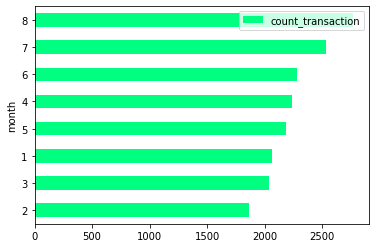

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

#Convert dataframe to pandas to do the visualization
count_transaction_2018_pandas = count_transaction_2018.toPandas()

#Draw the bar plot 
count_transaction_2018_pandas.plot(kind='barh', x='month', y='count_transaction', colormap='winter_r')
plt.show()

**Note**: As the mentined above,  the pyspark dataframe is immutable, the example below could illustrate the point clearer by comparing the id of the count_transaction_2018 dataframe.

In [160]:
#Check the rdd id of count_transaction_2018
count_transaction_2018.rdd.id()

666

In [161]:
from pyspark.sql.types import *

#create a function to measure the amount of transaction
def measure_transaction(number_of_transaction):
    """ we rank the performance of the month by the number of transaction
        > 2000: acceptable 
        < 2000: low """
    if number_of_transaction < 2000:
        return("low")
    return("acceptable")

#convert python function into udf function
udfmeasure_transaction = udf(measure_transaction,StringType())
count_transaction_2018 = count_transaction_2018.withColumn("measure_transaction",udfmeasure_transaction(count_transaction_2018.count_transaction))
count_transaction_2018.show()


+-----+----+-----------------+-------------------+
|month|year|count_transaction|measure_transaction|
+-----+----+-----------------+-------------------+
|    2|2018|             1864|         acceptable|
|    3|2018|             2037|         acceptable|
|    1|2018|             2061|         acceptable|
|    5|2018|             2182|         acceptable|
|    4|2018|             2233|         acceptable|
|    6|2018|             2283|         acceptable|
|    7|2018|             2529|         acceptable|
|    8|2018|             2771|         acceptable|
+-----+----+-----------------+-------------------+



**Note**: we could also use annotation to convert the python function to udf function

In [165]:
@udf(returnType=StringType())
def measure_transaction(number_of_transaction):
    if number_of_transaction < 2000:
        return("low")
    return("acceptable")

#udfmeasure_transaction = udf(measure_transtraction,StringType())
count_transaction_2018 = count_transaction_2018.withColumn("measure_transaction",measure_transaction(count_transaction_2018.count_transaction))
count_transaction_2018.show()


+-----+----+-----------------+-------------------+
|month|year|count_transaction|measure_transaction|
+-----+----+-----------------+-------------------+
|    2|2018|             1864|                low|
|    3|2018|             2037|         acceptable|
|    1|2018|             2061|         acceptable|
|    5|2018|             2182|         acceptable|
|    4|2018|             2233|         acceptable|
|    6|2018|             2283|         acceptable|
|    7|2018|             2529|         acceptable|
|    8|2018|             2771|         acceptable|
+-----+----+-----------------+-------------------+



 In Spark, when we do either adding a column or dropping one actually, we are creating a new Dataset/Dataframe, we could see the difference by checking the rdd ID.

In [166]:
#Check the rdd ID of the count_transaction_2018 dataframe
count_transaction_2018.rdd.id()

746

### Conclusion:
    By using PySpark, we could handle the bid data more efficiently. However, There are some differences to pandas dataframe, that need to pay attention to such as the immutable dataframe, the lazy processing, SQL query.

    In the next step, we could try to run Spark on cloud, such as Google Data Proc and using Spark in Google BigQuery.

 